<a href="https://colab.research.google.com/github/tnatani/Face-Emotion-Recognition/blob/main/Face_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [2]:
# connecting google drive to use dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_location = '/content/fer2013.csv'

In [9]:
#Read data
import pandas as pd
train = pd.read_csv('/content/fer2013.csv')

Text(0.5, 1.0, 'Distribution of emotions,(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprised, 6=Neutral)')

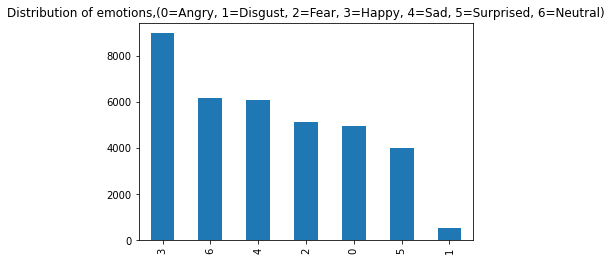

In [10]:
#Displaying total counts of different labels
import matplotlib.pyplot as plt
train.emotion.value_counts().plot(kind='bar')
plt.title("Distribution of emotions,(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprised, 6=Neutral)")

As we can see we have unbalanced data as every associated emotion has a different class. So we first need to balance the dataset with equal training data per class.


Text(0.5, 1.0, 'Distribution of emotions,(0=Angry,1=Fear, 2=Happy, 3 = Sad, 4=Surprised, 5=Neutral)')

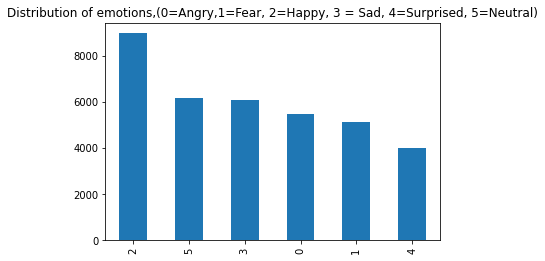

In [11]:
#There are very few samples of 'Disgust' so we will merge it with 'Angry'
train['emotion'] = train['emotion'].map( {0:0, 1:0, 2:1, 3:2, 4:3, 5:4, 6:5} ).astype(int)
train.emotion.value_counts().plot(kind='bar')
plt.title("Distribution of emotions,(0=Angry,1=Fear, 2=Happy, 3 = Sad, 4=Surprised, 5=Neutral)")

Text(0.5, 1.0, 'Distribution of emotions,(0=Angry,1=Fear, 2=Happy, 3 = Sad, 4=Surprise, 5=Neutral)')

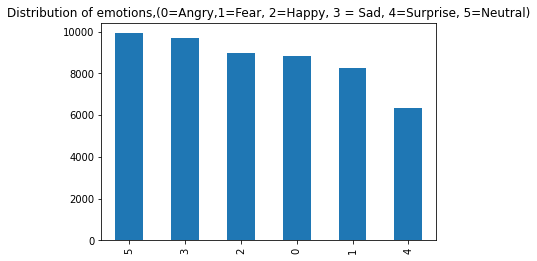

In [12]:
"Making copies of images to balance the class which prevents overfitting"
from sklearn.utils import shuffle

#As there are higher number of 'Happy' images, making copies of other images
df_copy = train[train.emotion != 2]
df_copy = df_copy[:int(0.6*len(df_copy.index))]
len(df_copy.index)
train_balanced = shuffle(pd.concat([train,df_copy]))

train_balanced.emotion.value_counts().plot(kind='bar')
plt.title("Distribution of emotions,(0=Angry,1=Fear, 2=Happy, 3 = Sad, 4=Surprise, 5=Neutral)")

In [14]:
# load data function is used to load data from the CSV file and return images and labels in the form of one hot encoded value
def load_data():
  # loading dataset as Dataframe
  dataset = pd.read_csv(file_location)
  images = []
  # converting each image data to float and reshaping it to 48 x 48
  for img in dataset.pixels:
    reshapedImage = np.fromstring(img, dtype=float, sep=' ').reshape(48,48)
    # append all images
    images.append(reshapedImage);

  # converting labels to one hot encoded values of float32
  emotions = pd.get_dummies(dataset.emotion).values.astype('float32')
  # return processed images and emotions
  return images, emotions

images, emotions = load_data()

In [15]:
# Splitting data into train, test and validation
X_train, X_rem, y_train, y_rem = train_test_split(images, emotions, train_size=0.8, shuffle=True)

# Splitting remaining data in half as validation and test data
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, shuffle=True)

# this function is used to change the data mean to 0 and standard deviation to 1
def standarize_data(data):
    # convert data to float32
    data = np.array(data, 'float32')
    # subtract mean from the data
    data -= np.mean(data, axis=0)
    # dividing the data with standard deviation
    data /= np.std(data, axis=0)
    return data

# standardizing all data
X_train = standarize_data(X_train)
X_test = standarize_data(X_test)
X_valid = standarize_data(X_valid)

In [16]:
# reshaping data into image
X_train = X_train.reshape(X_train.shape[0], 48,48,1)
X_test = X_test.reshape(X_test.shape[0], 48,48,1)
X_valid = X_valid.reshape(X_valid.shape[0], 48,48,1)